# Getting Started with PyCellID

## Abstract

PyCellID is an Open Source python package designed for recursively navigating a path and tracking down data tables and metadata (mapping), returning a unique CellData object. It relates easily the data with the associated images.

The power of PycellID will be maximized when working with images of time series.

file structure:

```bash
~folder_location
|
|--- my_experiment/
     |
     |---Position01/
     |   |---mapping.txt
     |   |---out_all.txt
     |   |
     |---Position02/
     |   |--- ...
     |   |
     |---Position03/
     |   |--- ...
     |   |
     |---Position32/
     |   |--- ...
     |   |
     |---channel-x_Position01_time01.tif
     |---channel-x_Position01_time01.tif.out.tif
     |--- ...
     |---channel-z_PositionW_timeY.tif
```

## Installation and impots <a id="0"></a>

### Installation <a id="0.1"></a>
PyCellID can be installed using pip from PyPI.

In [1]:
#!pip install pycellid

### Imports <a id="0.2"></a>


In [42]:
# Build or load your data, inspect your images and make plots.
from pycellid.core import CellData, CellsPloter

In [ ]:
# Build or load data frame.
import pycellid.io as ld

In [49]:
# Get a 2-D aray representing your images.
from pycellid import images

## Load your data<a id="1"></a>

### Load your data frame<a id="1.1"></a>

Instantiate a CellData from your data table and the path to your images.

In [39]:
df_from_ext = CellData(df=df_andy, path=path_img_andy)

In [40]:
df_from_ext

,pos,t_frame,cellID,ucid,time,xpos,ypos,a_tot,fft_stat,perim,...,a_nucl_y,f_vacuole_y,f_bg_y,xpos_nucl_y,ypos_nucl_y,f_local_bg_y,time_min,f_total_y,AF_nM,n_tot
0,1,0,1,1000001,0,42,378,368,0.278623,81.00051,...,49,62128,651.4436,40,380,693.4463,10,1.235638e+05,1.25,14.0
1,1,1,1,1000001,0,38,377,435,0.316254,92.05190,...,49,95671,654.5139,36,379,745.6183,25,1.939340e+05,1.25,14.0
2,1,2,1,1000001,0,35,380,433,0.361591,91.10346,...,49,11573,657.4092,33,383,826.4160,40,3.908739e+05,1.25,14.0
3,1,3,1,1000001,0,24,383,398,0.108711,74.43832,...,49,141934,661.5162,27,385,912.6392,55,5.958086e+05,1.25,14.0
4,1,4,1,1000001,0,32,385,499,0.372066,115.34010,...,49,37207,676.5335,29,386,1194.3290,70,7.547368e+05,1.25,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9755,31,8,51,31000051,0,207,263,124,0.844907,59.80689,...,16,90185,849.3024,220,262,4191.2910,130,4.986892e+04,20.00,NaN
9756,31,8,52,31000052,0,421,36,377,0.219790,77.40225,...,26,162660,849.3024,426,42,2214.3840,130,1.836850e+06,20.00,NaN
9757,31,0,5,31000005,0,97,165,113,0.355680,44.14447,...,27,4305,666.0594,103,164,668.9302,10,8.655887e+03,20.00,NaN
9758,31,6,48,31000048,0,213,23,154,0.045763,44.05000,...,49,82979,759.6545,212,23,1395.7660,100,2.309460e+05,20.00,NaN


### Build your data frame<a id="1.2"></a>

Build your data frame inspecting tables in each directory of the provided path.

### From Cell-ID output<a id="1.2.1"></a>

In [3]:
df = CellData.from_csv('samples_cellid')

In [45]:
display(df)

,pos,t_frame,ucid,cellID,time,xpos,ypos,a_tot,num_pix,fft_stat,...,f_nucl_tag6_tfp,f_nucl_tag6_yfp,f_local_bg_cfp,f_local_bg_rfp,f_local_bg_tfp,f_local_bg_yfp,f_local2_bg_cfp,f_local2_bg_rfp,f_local2_bg_tfp,f_local2_bg_yfp
0,1,0,100000000000,0,0,29,725,527.0,527,0.387982,...,1675334.0,54200.0,378.6183,240.4300,12571.83,312.5942,372.9697,241.2194,12523.050,310.0760
1,1,1,100000000000,0,0,31,725,614.0,614,0.443545,...,1473843.0,54020.0,383.6143,240.4676,12212.17,319.5286,377.4458,240.1235,12138.300,317.3976
2,1,2,100000000000,0,0,31,724,639.0,639,0.500724,...,1451150.0,46463.0,379.6064,241.2868,11988.62,322.5431,376.9560,242.0784,11993.090,323.3418
3,1,3,100000000000,0,0,31,725,688.0,688,0.591332,...,1566434.0,47871.0,390.2697,436.6727,11646.41,330.3378,391.3493,437.9252,11549.440,331.3429
4,1,4,100000000000,0,0,24,721,457.0,457,0.085026,...,1204067.0,52761.0,372.6058,241.3909,11593.46,330.6237,367.9105,242.5352,11503.960,329.0977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18184,3,12,300000000720,720,0,802,736,147.0,147,0.556508,...,1237009.0,39586.0,520.8205,254.4151,10049.78,612.9800,522.1818,254.9767,10533.790,621.8302
18185,3,12,300000000721,721,0,840,707,391.0,391,0.040324,...,1053566.0,44035.0,477.8000,248.6977,11320.68,576.1446,463.5887,250.3025,11368.400,571.9272
18186,3,12,300000000722,722,0,915,827,587.0,587,0.672861,...,1534440.0,58636.0,508.6136,250.6716,9132.60,578.7262,509.0000,250.9851,9129.724,572.0000
18187,3,12,300000000723,723,0,986,336,119.0,119,0.494793,...,469596.0,36213.0,530.8571,250.7143,11290.47,423.6049,536.5789,251.0638,11238.870,423.4595


## Inspect your data<a id="2"></a>

The development team decided to use [pandas](https://pandas.pydata.org/docs/) library as backend because of its syntax and its extensive documentation.
The idea is to make you feel you are working with a pandas object, but with the flexibility of having access to your experimental images.<br>

*You would be able to choose from different backends in future versions*.

In [46]:
df.describe()

,pos,t_frame,ucid,cellID,time,xpos,ypos,a_tot,num_pix,fft_stat,...,f_nucl_tag6_tfp,f_nucl_tag6_yfp,f_local_bg_cfp,f_local_bg_rfp,f_local_bg_tfp,f_local_bg_yfp,f_local2_bg_cfp,f_local2_bg_rfp,f_local2_bg_tfp,f_local2_bg_yfp
count,18189.000000,18189.000000,1.818900e+04,18189.000000,18189.0,18189.000000,18189.000000,18189.000000,18189.000000,18189.000000,...,1.818900e+04,1.818900e+04,18189.000000,18189.000000,18189.000000,18189.000000,18189.000000,18189.000000,18189.000000,18189.000000
mean,1.966078,6.216944,1.966078e+11,317.438947,0.0,683.000935,529.324097,441.458959,441.460718,0.265314,...,1.258965e+06,1.087345e+05,462.553463,258.523334,11753.645404,502.869092,459.888134,258.526309,11921.632917,489.371202
std,0.793782,3.726506,7.937819e+10,204.508054,0.0,396.587704,289.357639,241.039776,241.038580,0.225960,...,4.217068e+05,1.837672e+05,42.853657,50.494524,1378.053509,349.180950,44.225006,50.631219,1297.764306,308.290503
min,1.000000,0.000000,1.000000e+11,0.000000,0.0,9.000000,9.000000,98.000000,98.000000,0.018116,...,2.100890e+05,7.107000e+03,314.227900,232.300000,6984.529000,0.000000,316.946400,231.608700,0.000000,0.000000
25%,1.000000,3.000000,1.000000e+11,150.000000,0.0,327.000000,285.000000,277.000000,277.000000,0.068958,...,9.154950e+05,2.818300e+04,439.835400,244.754400,10809.180000,350.870100,435.564800,244.753600,11063.320000,351.651900
50%,2.000000,6.000000,2.000000e+11,297.000000,0.0,681.000000,538.000000,384.000000,384.000000,0.202481,...,1.177204e+06,4.325000e+04,463.130400,248.077800,11783.600000,397.611100,458.925400,248.076900,11939.820000,397.530600
75%,3.000000,9.000000,3.000000e+11,452.000000,0.0,1025.000000,779.000000,555.000000,555.000000,0.420594,...,1.592472e+06,1.144470e+05,486.517200,251.027400,12781.720000,511.681500,484.095600,250.980100,12887.200000,501.397500
max,3.000000,12.000000,3.000000e+11,966.000000,0.0,1384.000000,1032.000000,1499.000000,1499.000000,2.200194,...,2.342580e+06,2.358444e+06,734.365400,615.073200,15438.730000,6654.856000,971.200000,618.813700,15294.890000,7044.286000


### Using Cell-ID features<a id="2.1"></a>

## Cell-ID together with PyCellID provide 5 categories of calculated variables:

**1. General measurments**.

```
pos,
cellID,
ucid,
t_frame,
time,
xpos,
ypos,
f_tot,
a_tot,
fft_stat,
perim,
maj_axis,
min_axis,
flag,
rot_vol,
con_vol,
a_vacuole,
f_bg
```

**2. To calculate membrane proximal fluorescence (for relocalization experiment)**.
    
```
f_tot_p1_channels,
a_tot_p1,
f_tot_m1_channels,
a_tot_m1,x
f_tot_m2_channels,
a_tot_m2,
f_tot_m3_channels,
a_tot_m3
```
    
**3. Information obtained from "nuclear image" type (Variables containing the area and fluorescence of concentric disks of user-defined radius)**.

```
f_nucl_channels,
f_nucl1_channels to f_nucl6_channels,
a_nucl1 to a_nucl6,
f_nucl_tag1_channels to f_nucl_tag6_channels
```

**4. More background information**.

```
f_local_bg_channels,
a_local_bg,
a_local,
f_local2_bg_channels,
a_local2_bg,
a_local2
```

**5. More volume measurments**.

```
a_surf, sphere_vol, 
```

   *the final tag **_channels** indicates that the vatiable will be repeated for each illumination type.*

For detailed information, reading [Cell-ID](https://currentprotocols.onlinelibrary.wiley.com/doi/10.1002/0471142727.mb1418s100) documentation is recomended.

<AxesSubplot:>

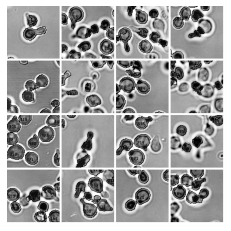

In [47]:
df.plot()

### View your images<a id="2.2"></a>

Obtain a numpy array representation of an image.
Make a crop, operate o simply plot it.

In [88]:
img = plt.imread("samples_cellid/YFP_Position01_time01.tif")

array = images.box_img(im=img, x_pos=640, y_pos=560, radius=30, mark_center=False)

array

array([[371., 348., 330., ...,   0.,   0.,   0.],
       [368., 351., 368., ...,   0.,   0.,   0.],
       [370., 363., 351., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

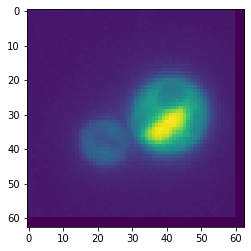

In [89]:
plt.imshow(array)

You can use PycellID accessor  to inspect images.
+ Use data from your dataframe for finding what you are looking for.

<AxesSubplot:>

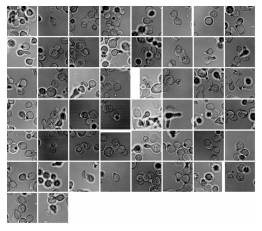

In [90]:
# Specify your values.
df.plot(array_img_kws={"channel":"tfp", "n":50, "criteria":{"a_tot":[0, 500]}})

### Use CellsPloter to inspect images

In [91]:
cells = CellsPloter(df)

<AxesSubplot:>

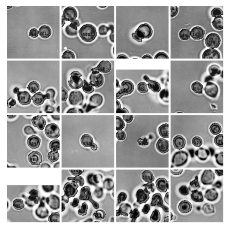

In [95]:
cells.cells_image()

## Example case<a id="3"></a>

Next we present a random experiment to show some functionality of PyCellID.<br>
We are going to analyze 1440 images (3 fluorescent channels 2 brightfield) with approx. 200 cells per field.

Considerations
---
While we hope you will focus your attention on the methods used, we do provide a bit of context. *Please note that this is an example*.

Background
---
The aim is to study the sub-cellular relocation of a reporter tagged with a fluorescent protein. For this example we will use the organism *Saccharomyces cerevisiae*.<br> 
In the model organism ,four MAPK pathways are active in haploid cells: The mating pathway, the filamentus growth pathway, the high osmolarity glycerol (HOG) pathway, and the cell wall integrity (CWI) pathway.<br>
<br>

The location of the studied reporter is altered by mechanisms involved in the response to pheromone ($\alpha$-factor) in the mating pathway.<br>

The mating pathway is activated in haploid cells in response to pheromone (a- or $\alpha$-factor). In MATa cells, the $\alpha$-factor is sensed by the G-protein coupled receptor Ste2. The binding of the ligand results in the dissociation of the trimeric G-protein. Free Gβγ recruits the scaffold pro-tein Ste5 to the plasma membrane, which promotes the activation of the MAP3K Ste11 and in turn activates the MAP2K Ste7. This kinase further activates two
MAPKs, Fus3 and Kss1, both of which contribute to the mating response. [Pelet 2015](https://doi.org/10.1186/s12915-015-0163-z).
<br>
For more details we recommend reading [Repetto et al.,2018](https://doi.org/10.1016/j.molcel.2018.02.018).<br>

Here we present modifications made to the Swi6 reporter and hope to quantify a nucleo-cytoplasm ratio of its localization.

## The experiment

Cells in exponential phase, grown overnight and diluted the next day in rich medium were used. They were arranged in a microscopy plate of 384 wells. See table 1. <br>

<br>
**Cepas**:<br>
*Control:*<br>
+ YPP5928 > HTA2::HTA2-CFP-KanMX6; Prsp2-STe7DS(1-33)-2XNLS(9SP)-mCherry-Ura3<br>
+ YPP5929 > HTA2::HTA2-CFP-KanMX6; Prsp2-STe7ND(1-33)-2XNLS(9SP)-mCherry-Ura3<br>
 *DS = Docking Site; ND = Non Docking Site*<br>

*Reposteros modificados:*<br>
+ Swi6 > HTA2::HTA2-CFP-KanMX6; Ste7DS(1-33)-NLS(SP-TP)-mCitrine<br>
+ Swi6 K shift > HTA2::HTA2-CFP-KanMX6; Ste7DS(1-33)-NLS(SP-TP)-mCitrine<br>

<table border width="80%" align="center" 
    bgcolor="#ffffcc" cellpadding="15">
    <caption>Table 1: Microscope plate order. Position mapping.</caption>
    <tr>
        <th>channel</th>
        <th colspan="8"; style="text-align:center">CFP :: histone2</th>
    </tr>
    <tr>
        <th>channel</th>
        <th colspan="6"; style="text-align:center">YFP</th>
        <th colspan="2"; style="text-align:center">RFP</th>
        </tr>
    <tr>
        <td> </td>
        <th colspan="3"; style="text-align:center">Swi6</th>
        <th colspan="3"; style="text-align:center">Swi6 k-shift</th>
        <th colspan="1"; style="text-align:center">Ste7 DS</th>
        <th colspan="1"; style="text-align:center">Ste7 ND</th>
    </tr>
    <tr>
        <th> </th>
        <th style="text-align:center">clon 1</th>
        <th style="text-align:center">clon 2</th>
        <th style="text-align:center">clon 3</th>
        <th style="text-align:center">clon 1</th>
        <th style="text-align:center">clon 2</th>
        <th style="text-align:center">clon 3</th>
        <th style="text-align:center">ctrl 1</th>
        <th style="text-align:center">ctrl 2</th>
    </tr>
    <tr>
        <th scope="row">$\alpha$F 100 nM</th>
        <td style="text-align:center">1-2</td>
        <td style="text-align:center">3-4</td>
        <td style="text-align:center">5-6</td>
        <td style="text-align:center">7-8</td>
        <td style="text-align:center">9-10</td>
        <td style="text-align:center">11-12</td>
        <td style="text-align:center">13-14</td>
        <td style="text-align:center">15-16</td>
    </tr>
    <tr>
        <th scope="row">$\alpha$F 0 nM</th>
        <td style="text-align:center">32-31</td>
        <td style="text-align:center">30-29</td>
        <td style="text-align:center">28-27</td>
        <td style="text-align:center">26-25</td>
        <td style="text-align:center">24-23</td>
        <td style="text-align:center">22-21</td>
        <td style="text-align:center">20-19</td>
        <td style="text-align:center">18-17</td>
    </tr>
</table>

*Each number in **Table1** represents a microscope image (2 per well). 
Two fields were recorded per fluorescent reporter per dose of $\alpha$F.* <br>

**Used fluorophores**:<br>
CFP: Histona2; CFP 440 nm.<br>
mCitrine: *Reporters to test*; YFP 500 nm.<br>
mCherry: *Controls*; RFP 585 nm.<br>
<br>
**Time-laps**:<br>
Total time: 2 h, time interval: 15 min, total 9 images.<br>

**Experimental details**: $\alpha$F 0 nM y 100 nM (saturante)<br>
Time-course: 2 hs. Image acquisition interval: 15 min.<br>
16 positcions, 9 images per position.<br>
$\alpha$F 100 nM was added on the microscope just before the time-course started.<br>
<br>
Observación:
-----------
The controls are in Cherry and the reporters I want to analyze in mCitrine<br>
YPP932 could habe been used as a control since it has the same fluorescent protein as my reporter. This desicion was made to avoid confusion. <br>
YPP5932	HTA2::HTA2-CFP-KanMX6;Prsp2-STe7DS(1-33)-2XNLS(9SP)-mCitrine-Trip  {Original Pellet Control, viene de pA675 (pED73 Pelet)}<br>